# Cat Or Dog 🐱

In [1]:
import os
import zipfile

In [2]:
#extract zip file
local_zip = '..../tensorflow_in_practise/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/home/ubuntu/love/tensorflow_in_practise')
zip_ref.close()

In [3]:
#setting up directory
base_dir = '.../tensorflow_in_practise/cats_and_dogs_filtered'

In [4]:
#base dir has train and validation dir and further each dir has cat and dog 

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.129.jpg', 'cat.546.jpg', 'cat.122.jpg', 'cat.721.jpg', 'cat.442.jpg', 'cat.182.jpg', 'cat.905.jpg', 'cat.781.jpg', 'cat.983.jpg', 'cat.947.jpg']
['dog.202.jpg', 'dog.204.jpg', 'dog.886.jpg', 'dog.436.jpg', 'dog.787.jpg', 'dog.311.jpg', 'dog.900.jpg', 'dog.214.jpg', 'dog.751.jpg', 'dog.726.jpg']


In [6]:
print("total train cat images:",len(os.listdir(train_cats_dir)))
print("total train dog images:",len(os.listdir(train_dogs_dir)))
print("total validation cat images:",len(os.listdir(validation_cats_dir)))
print("total validation cat images:",len(os.listdir(validation_cats_dir)))

total train cat images: 1000
total train dog images: 1000
total validation cat images: 500
total validation cat images: 500


In [8]:
#model defining
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
#imput image is of size 150by150 with 3 rgb filter

In [9]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [11]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
#data preprocessing convert image to tensor

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flow training images in batches of 20 using train_datagen generator

train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150,150))
validation_generator = test_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode='binary',target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
#train our model

history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 - 40s - loss: 0.7686 - accuracy: 0.5530 - val_loss: 0.6055 - val_accuracy: 0.6660
Epoch 2/15
100/100 - 35s - loss: 0.6059 - accuracy: 0.6815 - val_loss: 0.6309 - val_accuracy: 0.6180
Epoch 3/15
100/100 - 35s - loss: 0.5320 - accuracy: 0.7345 - val_loss: 0.5974 - val_accuracy: 0.6900
Epoch 4/15
100/100 - 35s - loss: 0.4465 - accuracy: 0.7880 - val_loss: 0.5849 - val_accuracy: 0.7200
Epoch 5/15
100/100 - 34s - loss: 0.3876 - accuracy: 0.8350 - val_loss: 0.6140 - val_accuracy: 0.7280
Epoch 6/15
100/100 - 37s - loss: 0.2884 - accuracy: 0.8755 - val_loss: 0.6659 - val_accuracy: 0.7080
Epoch 7/15
100/100 - 36s - loss: 0.1990 - accuracy: 0.9200 - val_loss: 0.7774 - val_accuracy: 0.7020
Epoch 8/15
100/100 - 37s - loss: 0.1636 - accuracy: 0.9490 - val_loss: 1.0283 - val_accuracy: 0.7090
Epoch 9/15
100/100 - 41s - loss: 0.1105 - accuracy: 0.9585 - val_loss: 0.9871 - val_accuracy: 0.70

/home/ubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


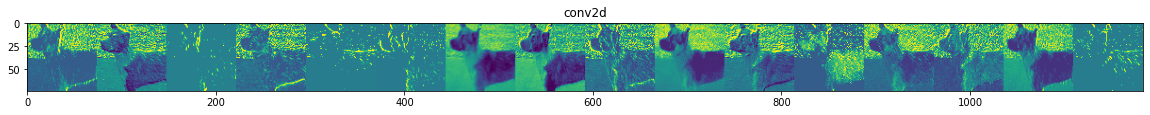

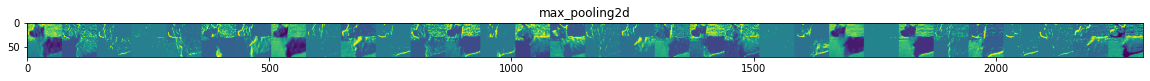

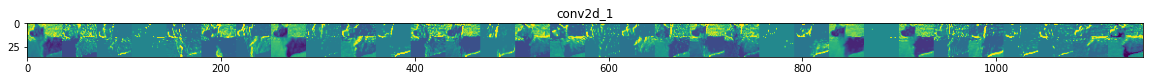

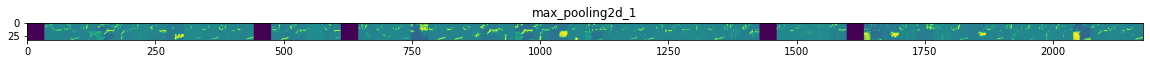

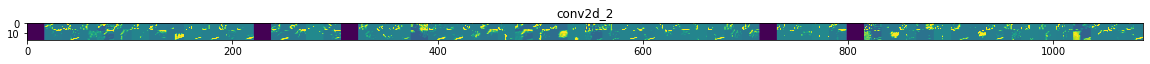

In [14]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt 

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

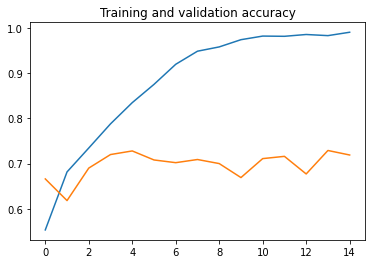

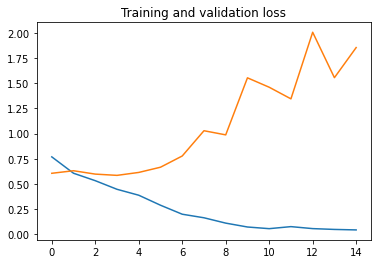

In [15]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [16]:
#Now using agumentation we will use ImageDtagenerator Class

train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 - 40s - loss: 0.7489 - accuracy: 0.6400 - val_loss: 0.6157 - val_accuracy: 0.6790
Epoch 2/15
100/100 - 38s - loss: 0.6148 - accuracy: 0.6515 - val_loss: 0.5195 - val_accuracy: 0.7390
Epoch 3/15
100/100 - 38s - loss: 0.5979 - accuracy: 0.6925 - val_loss: 0.5418 - val_accuracy: 0.7220
Epoch 4/15
100/100 - 38s - loss: 0.6017 - accuracy: 0.6995 - val_loss: 0.5162 - val_accuracy: 0.7550
Epoch 5/15
100/100 - 37s - loss: 0.5905 - accuracy: 0.6970 - val_loss: 0.5286 - val_accuracy: 0.7400
Epoch 6/15
100/100 - 38s - loss: 0.5850 - accuracy: 0.7080 - val_loss: 0.5833 - val_accuracy: 0.7320
Epoch 7/15
100/100 - 37s - loss: 0.5927 - accuracy: 0.7150 - val_loss: 0.5166 - val_accuracy: 0.7420
Epoch 8/15
100/100 - 38s - loss: 0.5649 - accuracy: 0.7195 - val_loss: 0.5082 - val_accuracy: 0.7430
Epoch 9/15
100/100 - 39s - loss: 0.5727 - accuracy: 0.7185 - val_loss: 0.5275 - val_accuracy: 0.7570
Epoch 1

In [19]:
print(history.history['accuracy'])
model.save("cat-vs-dog-weight.h5")

[0.64, 0.6515, 0.6925, 0.6995, 0.697, 0.708, 0.715, 0.7195, 0.7185, 0.7045, 0.724, 0.717, 0.733, 0.734, 0.739]


In [20]:
loaded_model = tf.keras.models.load_model("cat-vs-dog-weight.h5")
print(loaded_model.layers[0].input_shape)

(None, 150, 150, 3)


Cat


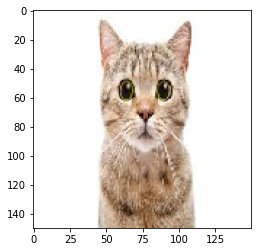

In [27]:
path = base_dir + '/cat1.jpeg'

from tensorflow.keras.preprocessing import image

img = image.load_img(path,target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)

img = img.reshape(1,150,150,3)
result=loaded_model.predict_classes(img)
for i in result:
    if i[0]==0:
        print("Cat")
    else:
        print("Dog")


Dog


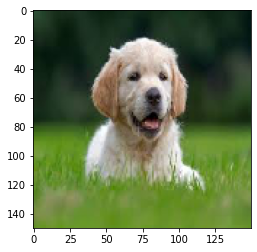

In [26]:
path = base_dir + '/dog.jpeg'

img = image.load_img(path,target_size=(150,150,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img)

img = img.reshape(1,150,150,3)
result=loaded_model.predict_classes(img)
for i in result:
    if i[0]==0:
        print("Cat")
    else:
        print("Dog")